### Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.


Right now, state-of-the-art analyses seems to say that many channels are all at play. This is a plot by [Zevin et al (2020)](https://arxiv.org/abs/2011.10057)


![Screen%20Shot%202022-01-15%20at%2013.34.38.png](attachment:Screen%20Shot%202022-01-15%20at%2013.34.38.png)

where they consider 5 possibilities for the formation of black hole binaries: common envelop (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT). 

If you want to know more about LIGO-driven astrophysics and black hole binaries formation channels, these are some recent reviews: [Mandel and Farmer (2021)](https://arxiv.org/abs/1806.05820), [Mapelli (2021)](https://arxiv.org/abs/2106.00699), [Gerosa and Fishbach (2021)](https://arxiv.org/abs/2105.03439).

Anyway. LIGO measures the masses of many black holes. You can find the dataset at `solutions/formationchannels.npy`.


*Hint*: Note that the data provided are of shape (N,1), not (N,). This might be confusing at first, but it's the format that sklearn wants (more on this in a future lecture).  A useful tool to convert between the two is [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).

Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model, and then train it on the data provided with the `fit` (the data provided are already in the right format!). It will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a method of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution and understand which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together

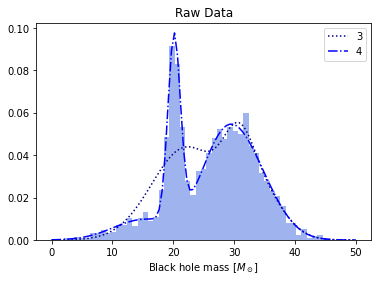

In [30]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

raw_data = np.load('../../solutions/formationchannels.npy')
raw_hist = plt.hist(raw_data, bins=50,density=True,color='royalblue', alpha=0.5)
plt.title('Raw Data')
plt.xlabel("Black hole mass $[M_\odot]$")
#plt.show()

N_max = 10
N = np.arange(1, N_max+1)
gm = lambda n : GaussianMixture(n_components=n, random_state=0,tol=1e-5).fit(raw_data)
def gauss(x,mu,s,w):
    y = w*np.exp(-(x-mu)**2/(2*s**2))*(np.sqrt(2*np.pi*s**2))**(-1)
    return y

for n in N:
    weights = gm(n).weights_
    means = gm(n).means_
    covariances = gm(n).covariances_
    x = np.linspace(0,50,100)
    y = np.zeros(len(x))
    for w, mu, s in zip(weights, means, np.sqrt(covariances)):
        y = y + gauss(x,mu,s,w)[0]
    
    if n == 3: plt.plot(x,y,label=str(n), c='navy', ls=':')
    if n == 4: plt.plot(x,y,label=str(n), c='blue', ls='-.')
plt.legend()

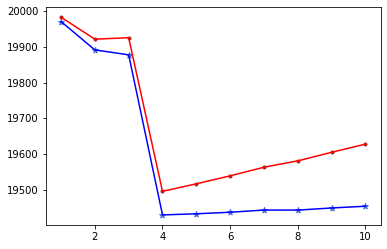

In [31]:
AIC = [gm(n).aic(raw_data) for n in N]
BIC = [gm(n).bic(raw_data) for n in N]
plt.plot(N,AIC, c='b')
plt.scatter(N,AIC, marker='*', c='royalblue')
plt.plot(N,BIC, c='r')
plt.scatter(N,BIC, marker='.', c='firebrick')

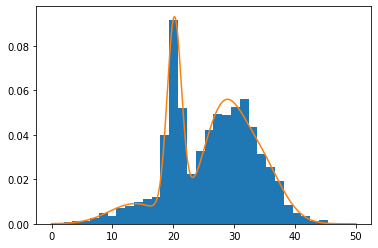

In [57]:
x = np.linspace(0,50,1000)
y = np.exp(gm(4).score_samples(x.reshape(-1, 1))) # restituisce la log_likelihood di un sample
plt.hist(raw_data,density=True,bins=30)
plt.plot(x,y)

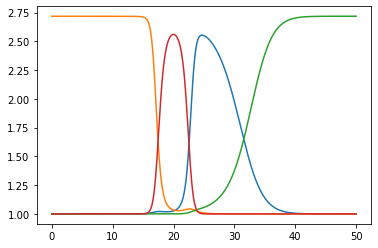

In [81]:
x = np.linspace(0,50,1000)
y = np.exp(gm(4).predict_proba(x.reshape(-1, 1)))
## Predict the labels for the data samples in X using trained model.
# onestamente, non ho idea di cosa sia.

# Manca moltiplicare per la .pdf lol
plt.plot(x,y)